In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzAy'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
stent30 = pd.read_csv("data/stent30.csv")
stent30.head()

,group,outcome
0,treatment,stroke
1,treatment,stroke
2,treatment,stroke
3,treatment,stroke
4,treatment,stroke


In [4]:
# Create a frequency table for the 'group' and 'outcome' columns
frequency_table = pd.crosstab(index = stent30['group'], columns = stent30['outcome'])

frequency_table

outcome,no event,stroke
group,,
control,214,13
treatment,191,33


In [5]:
# Convert frequency table to a proportional table
proportional_table = frequency_table / frequency_table.sum().sum()

proportional_table.round(2)

outcome,no event,stroke
group,,
control,0.47,0.03
treatment,0.42,0.07


In [6]:
#| code-line-numbers: "1-9|2|4,5,6,7"

# Performing the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(frequency_table)

print(f"Chi-squared statistic: {round(chi2, 2)}")
print(f"P-value: {round(p, 3)}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected.round(2)}")

Chi-squared statistic: 9.02
P-value: 0.003
Degrees of freedom: 1
Expected frequencies:
[[203.85  23.15]
 [201.15  22.85]]


In [7]:
loan50 = pd.read_csv("data/loan50.csv")
loan50.head()

,state,emp_length,term,homeownership,annual_income,verified_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_purpose,loan_amount,grade,interest_rate,public_record_bankrupt,loan_status,has_second_income,total_income
0,NJ,3.0,60,rent,59000.0,Not Verified,0.557525,95131,32894,8,debt_consolidation,22000,B,10.90,0,Current,False,59000.0
1,CA,10.0,36,rent,60000.0,Not Verified,1.305683,51929,78341,2,credit_card,6000,B,9.92,1,Current,False,60000.0
2,SC,NaN,36,mortgage,75000.0,Verified,1.056280,301373,79221,14,debt_consolidation,25000,E,26.30,0,Current,False,75000.0
3,CA,0.0,36,rent,75000.0,Not Verified,0.574347,59890,43076,10,credit_card,6000,B,9.92,0,Current,False,75000.0
4,OH,4.0,60,mortgage,254000.0,Not Verified,0.238150,422619,60490,2,home_improvement,25000,B,9.43,0,Current,False,254000.0


In [8]:
county = pd.read_csv("data/county.csv")

county.dtypes

name                  object
state                 object
pop2000              float64
pop2010                int64
pop2017              float64
pop_change           float64
poverty              float64
homeownership        float64
multi_unit           float64
unemployment_rate    float64
metro                 object
median_edu            object
per_capita_income    float64
median_hh_income     float64
smoking_ban           object
dtype: object

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_74607/3862043842.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])
/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_74607/3862043842.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


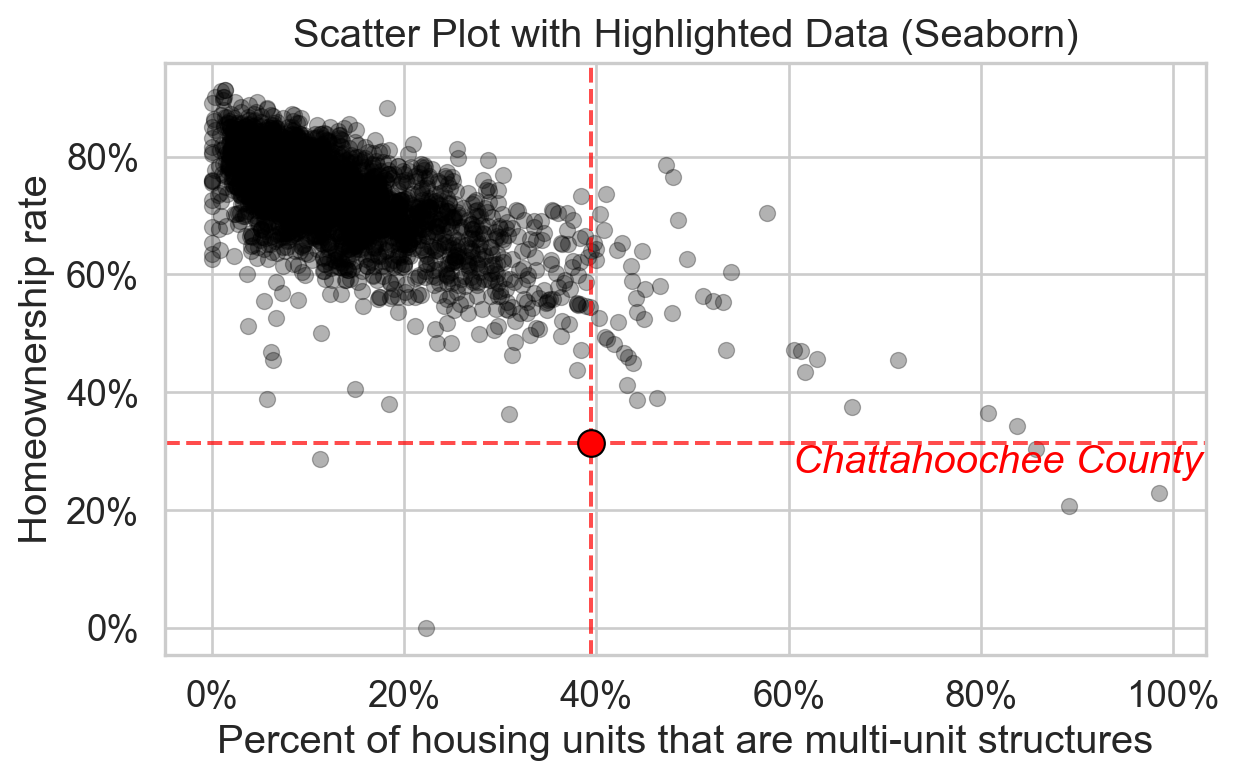

In [9]:
#| label: county-scatter-1
#| echo: false

# Filtering data for Chattahoochee County
chattahoochee = county[county['name'] == 'Chattahoochee County']

# Setting up the plot size
plt.figure(figsize = (7, 4))

# Setting up the plot font scale
sns.set_theme(font_scale=1.25)

# Setting seaborn style
sns.set_style("whitegrid")

# Main scatter plot for all data
sns.scatterplot(data = county, x = 'multi_unit', y = 'homeownership', alpha = 0.3, color = 'black', edgecolor = 'black')

# Highlighting Chattahoochee County
sns.scatterplot(data = chattahoochee, x = 'multi_unit', y = 'homeownership', 
                color = 'red', s = 100, edgecolor = 'black', zorder = 5)

# Adding annotation for Chattahoochee County
for _, row in chattahoochee.iterrows():
    plt.text(row['multi_unit'] + 21, row['homeownership'] - 5, 'Chattahoochee County', 
             color = 'red', fontstyle = 'italic')

# Drawing dashed lines for Chattahoochee County
for _, row in chattahoochee.iterrows():
    plt.axhline(y = row['homeownership'], color = 'red', linestyle = 'dashed', alpha = 0.7)
    plt.axvline(x = row['multi_unit'], color = 'red', linestyle = 'dashed', alpha = 0.7)

# Setting labels and formats
plt.xlabel("Percent of housing units that are multi-unit structures")
plt.ylabel("Homeownership rate")
plt.title("Scatter Plot with Highlighted Data (Seaborn)")

# Setting the scale to percentage
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])
plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])

plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_74607/95726759.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])
/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_74607/95726759.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


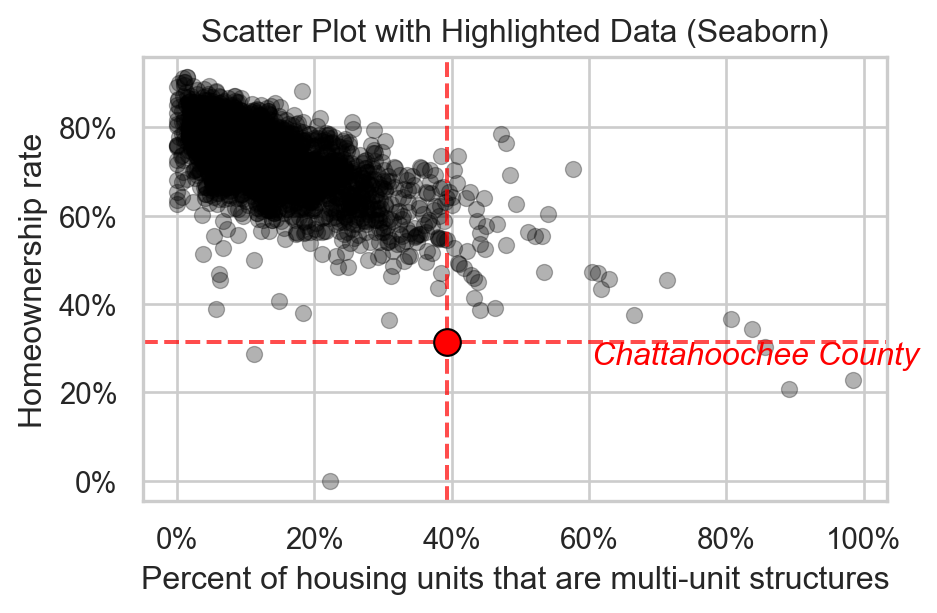

In [10]:
#| echo: false

# Filtering data for Chattahoochee County
chattahoochee = county[county['name'] == 'Chattahoochee County']

# Setting up the plot size
plt.figure(figsize = (5, 3))

# Setting up the plot font scale
sns.set_theme(font_scale = 1)

# Setting seaborn style
sns.set_style("whitegrid")

# Main scatter plot for all data
sns.scatterplot(data = county, x = 'multi_unit', y = 'homeownership', alpha = 0.3, color = 'black', edgecolor = 'black')

# Highlighting Chattahoochee County
sns.scatterplot(data = chattahoochee, x = 'multi_unit', y = 'homeownership', 
                color = 'red', s = 100, edgecolor = 'black', zorder = 5)

# Adding annotation for Chattahoochee County
for _, row in chattahoochee.iterrows():
    plt.text(row['multi_unit'] + 21, row['homeownership'] - 5, 'Chattahoochee County', 
             color = 'red', fontstyle = 'italic')

# Drawing dashed lines for Chattahoochee County
for _, row in chattahoochee.iterrows():
    plt.axhline(y = row['homeownership'], color = 'red', linestyle = 'dashed', alpha = 0.7)
    plt.axvline(x = row['multi_unit'], color = 'red', linestyle = 'dashed', alpha = 0.7)

# Setting labels and formats
plt.xlabel("Percent of housing units that are multi-unit structures")
plt.ylabel("Homeownership rate")
plt.title("Scatter Plot with Highlighted Data (Seaborn)")

# Setting the scale to percentage
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])
plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])

plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_74607/3852458104.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}K'.format(x/1000) for x in plt.gca().get_xticks()])


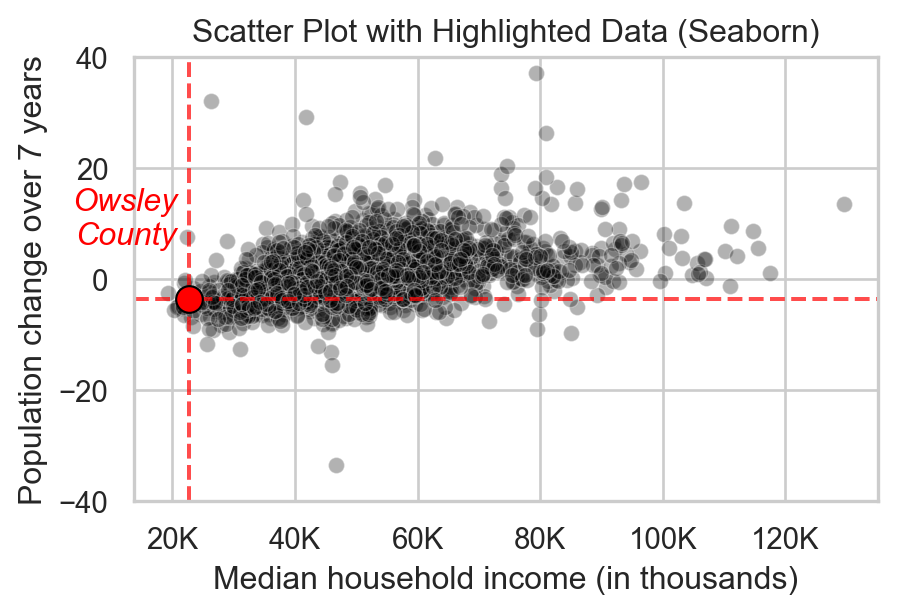

In [11]:
#| echo: false

# Filtering data for Owsley County
owsley_county = county[county['name'] == 'Owsley County']

# Setting up the plot
plt.figure(figsize = (5, 3))

# Setting up the plot font scale
sns.set_theme(font_scale = 1)

# Setting seaborn style
sns.set_style("whitegrid")

# Main scatter plot for all data
sns.scatterplot(data = county, x = 'median_hh_income', y = 'pop_change', alpha = 0.3, color = 'black')

# Highlighting Owsley County
sns.scatterplot(data = owsley_county, x = 'median_hh_income', y = 'pop_change', 
                color = 'red', s = 100, edgecolor = 'black', zorder = 5)

# Adding annotation for Owsley County
for _, row in owsley_county.iterrows():
    plt.text(row['median_hh_income'] - 2000, row['pop_change'] + 10, 'Owsley\nCounty', 
             color = 'red', fontstyle = 'italic', horizontalalignment = 'right')

# Drawing dashed lines for Owsley County
for _, row in owsley_county.iterrows():
    plt.axhline(y = row['pop_change'], color = 'red', linestyle = 'dashed', alpha = 0.7)
    plt.axvline(x = row['median_hh_income'], color = 'red', linestyle = 'dashed', alpha = 0.7)

# Setting labels and formats
plt.xlabel("Median household income (in thousands)")
plt.ylabel("Population change over 7 years")
plt.title("Scatter Plot with Highlighted Data (Seaborn)")

# Formatting the x-axis as thousands (K)
plt.gca().set_xticklabels(['{:.0f}K'.format(x/1000) for x in plt.gca().get_xticks()])
# Limiting y-axis to -40 to 40
plt.ylim(-40, 40)

plt.show()